## 读入 iris 数据

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
print(iris.target_names)
X.shape

['setosa' 'versicolor' 'virginica']


(150, 4)

In [9]:
np.unique(iris.target,return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

## Perform PCA

In [10]:
m = np.mean(X,axis=0)
X = X - m
my_cov = 1/150 * X.T.dot(X)
Eigval,Eigvec = np.linalg.eig(my_cov)
P = Eigvec[:,:2]
X_DR = X.dot(P)
X_DR.shape

(150, 2)

## Creat the Distance Matrix

In [11]:
from scipy.cluster.hierarchy import fcluster, linkage
# Use the linkage() function
distance_matrix = linkage(X_DR, method = 'single', metric = 'euclidean')

## The dendrogram function

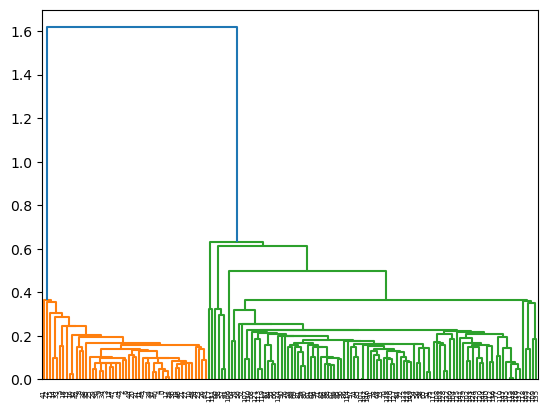

In [12]:
from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
dn = dendrogram(distance_matrix)
# Display the dendogram
plt.show()

## Assign cluster labels

In [13]:
pred_target = fcluster(distance_matrix, 3, criterion='maxclust')
print(pred_target)
np.unique(pred_target,return_counts=True)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


(array([1, 2, 3], dtype=int32), array([50,  2, 98], dtype=int64))

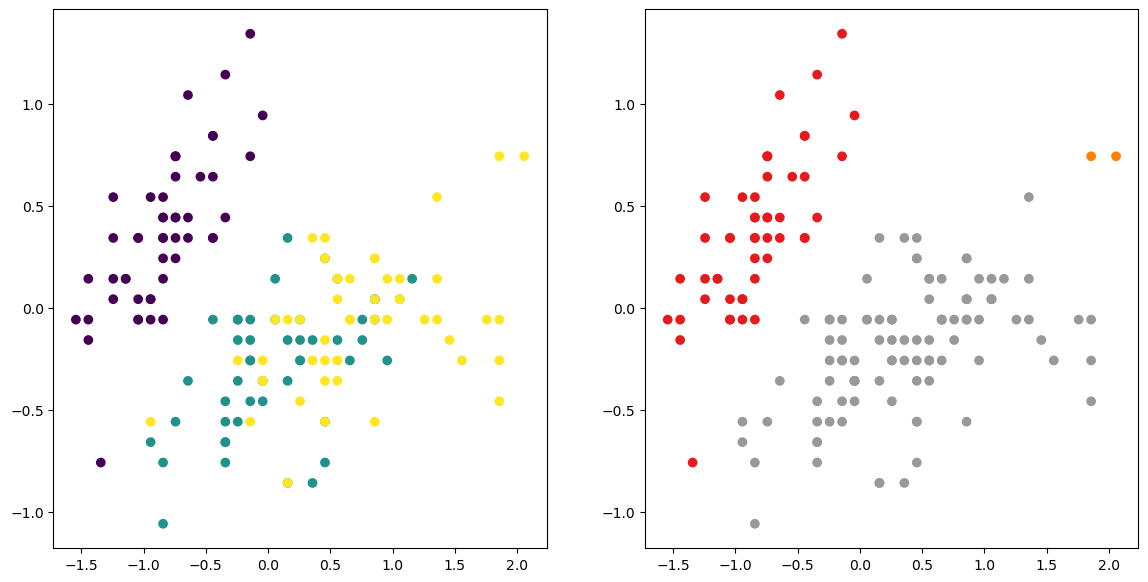

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))
axes[0].scatter(X[:,0], X[:,1], c=iris.target)
axes[1].scatter(X[:,0], X[:,1], c=pred_target, cmap=plt.cm.Set1)